In [1]:
import numpy as np

from pollen_manipulation.reachy_2.api import Reachy2ManipulationAPI

from pollen_vision.camera_wrappers.depthai import SDKWrapper
from pollen_vision.camera_wrappers.pollen_sdk_camera.pollen_sdk_camera_wrapper import PollenSDKCameraWrapper
from pollen_vision.camera_wrappers.depthai.utils import get_config_file_path
from pollen_vision.perception import Perception
from scipy.spatial.transform import Rotation

import FramesViewer.utils as fv_utils
from reachy2_sdk import ReachySDK

import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

#T_world_cam = fv_utils.make_pose([0.052644, 0.01, 0.034150], [0, 0, 0])
T_world_cam = fv_utils.make_pose([0.049597, 0.009989, 0.038089], [0, 0, 0])
T_world_cam[:3, :3] = np.array([[0, 0, 1], [-1, 0, 0], [0, -1, 0]])
T_world_cam = fv_utils.rotateInSelf(T_world_cam, [-48, 0, 0])

#T_world_cam = fv_utils.rotateInSelf(T_world_cam, [-48.0-90.0, 0, -90.0])

reachy = ReachySDK(host='localhost')
#cam = PollenSDKCameraWrapper(reachy)
cam = SDKWrapper(get_config_file_path("CONFIG_SR"), compute_depth=True)

K = cam.get_K()
print(K)

manipulation_api = Reachy2ManipulationAPI(reachy, T_world_cam, K)

perception = Perception(
    camera_wrapper=cam, T_world_cam=T_world_cam, freq=30.0
)
perception.start(visualize=False)

#perception.set_tracked_objects(['bottle'])
#perception.set_tracked_objects(['hammer'])
perception.set_tracked_objects(['mug','grey duct tape','scissors','pen','computer','metalic bolt with washer and nut', 'motor', 'pcb', 'small green printed circuit board with white connectors','small cylindrical metalic electric motor with wires'])

/home/steve/Project/Repo/Pollen/grasping/venv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


[05/29/24 16:09:17] WARNING  Your inference package version 0.9.13 is out of date! Please upgrade to ]8;id=445127;file:///home/steve/Project/Repo/Pollen/grasping/venv/lib/python3.10/site-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=719356;file:///home/steve/Project/Repo/Pollen/grasping/venv/lib/python3.10/site-packages/inference/core/__init__.py#35\35]8;;\
                             version 0.11.2 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

[19443010B13E782700] [5.2] [1.367] [ColorCamera(1)] [warning] Unsupported resolution set for detected camera OV9782, needs 800_P or 720_P. Defaulting to 800_P
[19443010B13E782700] [5.2] [1.367] [ColorCamera(0)] [warning] Unsupported resolution set for detected camera OV9782, needs 800_P or 720_P. Defaulting to 800_P
[[     797.08           0      658.74]
 [          0      796.51      409.99]
 [          0           0           1]]
model func:  <module 'contact_graspnet_pytorch.contact_graspnet' from '/home/steve/Project/Repo/Pollen/grasping/venv/lib/python3.10/site-packages/contact_graspnet_pytorch/contact_graspnet.py'>
/home/steve/.cache/huggingface/hub/models--pollen-robotics--contact_graspnet/snapshots/16f1311d6380e2e6d4394d250897585fea0258a2/checkpoints/contact_graspnet/checkpoints/model.pt
=> Loading checkpoint from local file...
Adding tracking for object: mug
Adding tracking for object: grey duct tape
Adding tracking for object: scissors
Adding tracking for object: pen
Adding t

Cameras not initialized.


SAM infer timing: 0.3375067710876465
SAM infer in
Perception: push obs timing 0.13397669792175293
Perception true timing: 0.5264527797698975
Perception tick: 0.03338932991027832
Perception OF timing: 0.011063814163208008
YOLO infer in
YOLO infer timing: 0.07925701141357422
YOLO infer out
SAM infer in
SAM infer timing: 0.4366786479949951
SAM infer in
Perception: push obs timing 0.06528759002685547
Perception true timing: 0.5973937511444092
Perception tick: 0.0333704948425293
Perception OF timing: 0.01176905632019043
YOLO infer in
YOLO infer timing: 0.04484963417053223
YOLO infer out
SAM infer in
SAM infer timing: 0.527491569519043
SAM infer in
Perception: push obs timing 0.06793689727783203
Perception true timing: 0.65604567527771
Perception tick: 0.03334212303161621
Perception OF timing: 0.010428905487060547
YOLO infer in
YOLO infer timing: 0.03935670852661133
YOLO infer out
SAM infer in
SAM infer timing: 0.4239802360534668
SAM infer in
Perception: push obs timing 0.0737912654876709
Pe

In [14]:
reachy.connect()

Already connected to Reachy.


In [2]:
manipulation_api.turn_robot_on()

In [3]:
manipulation_api.goto_rest_position(left=True)

In [4]:
manipulation_api.goto_rest_position(left=False)

In [5]:
reachy.l_arm.gripper.open()
reachy.r_arm.gripper.open()


In [ ]:
reachy.l_arm.gripper.close()
reachy.r_arm.gripper.close()

In [ ]:
reachy.l_arm.inverse_kinematics(T_world_cam)

In [ ]:
#perception.set_tracked_objects(['apple'])
perception.tracked_objects=['grey duct tape','scissors','pen','computer','metalic bolt with washer and nut', 'motor', 'pcb', 'small green printed circuit board with white connectors','small cylindrical metalic electric motor with wires']

In [ ]:
print(perception.tracked_objects)
perception.last_predictions

In [2]:
import matplotlib.pyplot as plt
import cv2

In [3]:
image=perception.last_im
for i in perception.last_predictions:
    print(i)
    image = cv2.rectangle(image, (i['box']['xmin'],i['box']['ymin']), (i['box']['xmax'],i['box']['ymax']), (255,0,0), 3)
    image = cv2.putText(image, i['label'], (i['box']['xmin'],i['box']['ymin']-10), cv2.FONT_HERSHEY_SIMPLEX ,  1, (255,0.0), 2, cv2.LINE_AA) 
    image = cv2.putText(image, f"{i['score']:.2f}", (i['box']['xmin'],i['box']['ymax']+30), cv2.FONT_HERSHEY_SIMPLEX ,  1, (255,0.0), 2, cv2.LINE_AA) 


{'label': 'mug', 'score': 0.9338530898094177, 'box': {'xmin': 712, 'ymin': 335, 'xmax': 852, 'ymax': 544}}
{'label': 'pen', 'score': 0.9276017546653748, 'box': {'xmin': 576, 'ymin': 433, 'xmax': 643, 'ymax': 590}}
{'label': 'mug', 'score': 0.7872157692909241, 'box': {'xmin': 466, 'ymin': 304, 'xmax': 616, 'ymax': 496}}
{'label': 'computer', 'score': 0.4346480369567871, 'box': {'xmin': 0, 'ymin': 0, 'xmax': 405, 'ymax': 378}}
{'label': 'computer', 'score': 0.20128023624420166, 'box': {'xmin': 939, 'ymin': 0, 'xmax': 1280, 'ymax': 520}}
{'label': 'pen', 'score': 0.07310401648283005, 'box': {'xmin': 816, 'ymin': 236, 'xmax': 995, 'ymax': 285}}
{'label': 'scissors', 'score': 0.03498637676239014, 'box': {'xmin': 701, 'ymin': 242, 'xmax': 889, 'ymax': 325}}
{'label': 'computer', 'score': 0.023305203765630722, 'box': {'xmin': 916, 'ymin': 1, 'xmax': 1279, 'ymax': 798}}
{'label': 'pen', 'score': 0.020538106560707092, 'box': {'xmin': 0, 'ymin': 169, 'xmax': 109, 'ymax': 196}}
{'label': 'pen', '

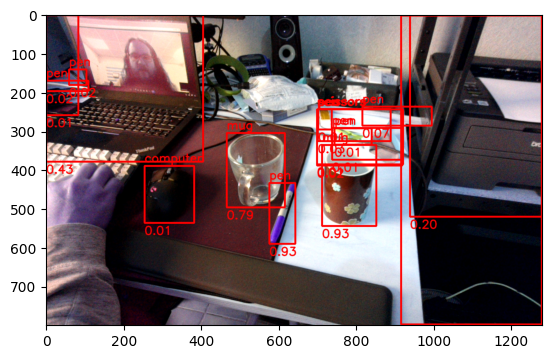

In [4]:
#cv2.imwrite('test_steve4.png',perception.last_im)
plt.imshow(image)
#plt.imshow(perception.last_depth*100)
plt.show()
#cv2.imshow('left',perception.last_im)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
np.count_nonzero(np.isnan(perception.last_depth))

In [10]:
print(f"last pred: {perception.last_predictions}\n\n")
print(f"obj info: {perception.get_objects_infos(threshold=0.1)}")

last pred: [{'label': 'mug', 'score': 0.9306036233901978, 'box': {'xmin': 712, 'ymin': 336, 'xmax': 852, 'ymax': 543}}, {'label': 'pen', 'score': 0.9303337335586548, 'box': {'xmin': 576, 'ymin': 433, 'xmax': 643, 'ymax': 590}}, {'label': 'mug', 'score': 0.7590016722679138, 'box': {'xmin': 466, 'ymin': 304, 'xmax': 616, 'ymax': 495}}, {'label': 'computer', 'score': 0.3855280578136444, 'box': {'xmin': 0, 'ymin': 0, 'xmax': 404, 'ymax': 378}}, {'label': 'computer', 'score': 0.25755783915519714, 'box': {'xmin': 942, 'ymin': 0, 'xmax': 1279, 'ymax': 519}}, {'label': 'pen', 'score': 0.0913517102599144, 'box': {'xmin': 815, 'ymin': 236, 'xmax': 992, 'ymax': 287}}, {'label': 'scissors', 'score': 0.03993204981088638, 'box': {'xmin': 700, 'ymin': 242, 'xmax': 889, 'ymax': 325}}, {'label': 'pen', 'score': 0.0243882667273283, 'box': {'xmin': 700, 'ymin': 242, 'xmax': 919, 'ymax': 388}}, {'label': 'scissors', 'score': 0.019850507378578186, 'box': {'xmin': 700, 'ymin': 243, 'xmax': 921, 'ymax': 385}

In [ ]:
print(perception.get_objects_infos())
object_info = [info for info in perception.get_objects_infos() if info['name'] == 'apple']

if len(object_info) == 0:
    print('No apple found')

elif len(object_info) == 1:
    bottle_info = object_info[0]
    print('Found a apple')

else:
    print(f'Found {len(object_info)} apple')

In [6]:
from scipy.spatial.transform import Rotation as R

def compute_goal_diff(fk_matrix, goal_pose):
    return np.linalg.norm(fk_matrix - selected_array)

def compute_l2_distance(fk_matrix, goal_pose):
    return np.linalg.norm(fk_matrix[:-1, 3] - goal_pose[:-1, 3])


def produce_symetrical_poses(grasp_poses):
    symetrical_grasp_poses = []

    for grasp_pose in grasp_poses:
        symetrical_grasp_pose = np.eye(4)
        x, y, z = grasp_pose[:-1, 3]
        symetrical_grasp_pose[:-1, 3] = [x, -y, z]

        rotation_matrix = grasp_pose[:-1, :-1]
        roll, pitch, yaw = R.from_matrix(rotation_matrix).as_euler("xyz", degrees=True)
        symetrical_grasp_pose[:-1, :-1] = R.from_euler("xyz", [-roll, pitch, -yaw], degrees=True).as_matrix()
        symetrical_grasp_poses.append(symetrical_grasp_pose)

    return symetrical_grasp_poses

# Define the initial pose matrices for each arm used by goto_rest_position API method
right_start_pose = np.array([
    [0.0, 0.0, -1.0, 0.20],
    [0.0, 1.0, 0.0, -0.24],
    [1.0, 0.0, 0.0, -0.23],
    [0.0, 0.0, 0.0, 1.0],
])
left_start_pose = np.array([
    [0.0, 0.0, -1.0, 0.20],
    [0.0, 1.0, 0.0, 0.24],
    [1.0, 0.0, 0.0, -0.23],
    [0.0, 0.0, 0.0, 1.0],
])

In [7]:
def get_object(name,score=0.1):
    for o in perception.get_objects_infos(threshold=0.1):
        print(f"Object: {o['name']} score: {o['detection_score']}")
    #print(f'ALL OBJECTS: {perception.get_objects_infos()}')
    object_info = [info for info in perception.get_objects_infos(threshold=0.1) if info['name'] == name]
    print(f'OBJECT INFO: {object_info}')
    if len(object_info) == 0:
        print(f'No {name} found')
        return None, None, None, None
    elif len(object_info) == 1 and object_info[0]["detection_score"]>score:
        obj_info = object_info[0]
        print(f'Found a {name}')
        return obj_info["pose"], obj_info["rgb"], obj_info["mask"], obj_info["depth"]
    else:
        obj_info = object_info[0]
        print(f'Found {len(object_info)} {name}')
        return obj_info["pose"], obj_info["rgb"], obj_info["mask"], obj_info["depth"]
    

objs: [{'name': 'mug', 'pose': array([[          1,           0,           0,     0.36867],
       [          0,           1,           0,   -0.063831],
       [          0,           0,           1,     -0.3385],
       [          0,           0,           0,           1]]), 'rgb': array([[[ 50,  31,  41],
        [ 50,  31,  41],
        [ 53,  33,  43],
        ...,
        [214, 190, 180],
        [200, 190, 178],
        [208, 198, 186]],

       [[ 50,  31,  41],
        [ 50,  31,  41],
        [ 53,  33,  43],
        ...,
        [214, 190, 180],
        [200, 190, 178],
        [208, 198, 186]],

       [[ 47,  27,  37],
        [ 47,  27,  37],
        [ 51,  32,  42],
        ...,
        [213, 189, 179],
        [202, 192, 180],
        [200, 190, 178]],

       ...,

       [[202, 179, 167],
        [202, 179, 167],
        [203, 180, 168],
        ...,
        [  4,   0,   8],
        [ 10,   0,   0],
        [ 10,   0,   0]],

       [[202, 178, 161],
        [202, 178,

ValueError: string is not a file: /home/steve/Project/Repo/Pollen/grasping/venv/lib/python3.10/site-packages/gripper_models/panda_gripper/hand.stl

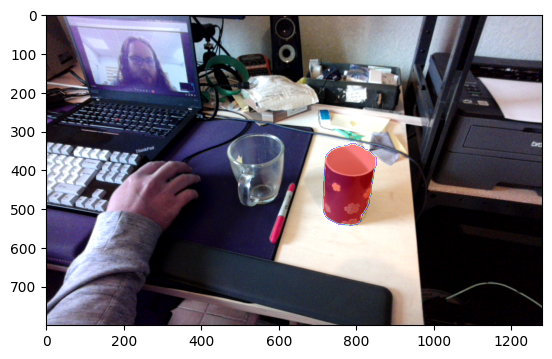

In [9]:
import time

#pose = bottle_info["pose"]
#rgb = bottle_info["rgb"]
#mask = bottle_info["mask"]
#depth = bottle_info["depth"]
#print(f"last pred: {perception.last_predictions}\n\n")
print(f"objs: {perception.get_objects_infos(threshold=0.1)}")
pose, rgb, mask, depth = get_object("mug", score=0.5)

left = True

if left:
    arm = manipulation_api.reachy.l_arm
    symetrical_arm = manipulation_api.reachy.r_arm
    start_pose = left_start_pose
    
else:
    arm = manipulation_api.reachy.r_arm
    symetrical_arm = manipulation_api.reachy.l_arm
    start_pose = right_start_pose

#raw_grasp_poses, raw_scores = manipulation_api.get_grasp_poses(rgb,depth,mask,left)
grasp_poses, _, raw_grasp_poses, raw_scores = manipulation_api.get_reachable_grasp_poses(rgb, depth, mask, left)
grasp_poses.insert(0, start_pose)

symetrical_grasp_poses = produce_symetrical_poses(grasp_poses)

print(len(grasp_poses))
for g in grasp_poses:
    #print(g)
    rot=g[:3,:3]
    r=Rotation.from_matrix(rot)
    print(f"mat: {g} \t rot: {r.as_euler('xyz',degrees=True)}")
    print("\n")
print("\n\n")
for g in raw_grasp_poses:
    rot=g[:3,:3]
    r=Rotation.from_matrix(rot)
    print(f"mat:\n{g} \t rot: {r.as_euler('xyz',degrees=True)}")
    print("\n")

In [21]:
#reachy.l_arm.inverse_kinematics?
#raw_grasp_poses
for p in raw_grasp_poses:
    try:
        reachy.l_arm.inverse_kinematics(p)
    except Exception as e:
        print(e)

No solution found for the given target ([[   -0.16863     0.89231     0.41875      0.4096]
 [   -0.97562    -0.21165    0.058109   -0.079455]
 [    0.14048    -0.39874     0.90624    -0.21771]
 [          0           0           0           1]])!
No solution found for the given target ([[   -0.38086      0.8872     0.26042     0.37439]
 [    -0.8804    -0.26189    -0.39536     -0.1188]
 [   -0.28256    -0.37985     0.88084    -0.24138]
 [          0           0           0           1]])!
No solution found for the given target ([[   -0.34481     0.86386     0.36723     0.39714]
 [    -0.9141    -0.22009    -0.34055    -0.10919]
 [   -0.21337    -0.45312     0.86554    -0.23447]
 [          0           0           0           1]])!
No solution found for the given target ([[    0.17472     0.87287      0.4556     0.41577]
 [   -0.98347     0.13238     0.12355    -0.05052]
 [    0.04753    -0.46966     0.88157    -0.22047]
 [          0           0           0           1]])!
No solution 

In [ ]:
grasp_poses

In [ ]:
import FramesViewer.utils as fv_utils
print(start_pose)
test_pose = np.array([
    [1.0, 0.0, 0.0, 0.20],
    [0.0, 1.0, 0.0, 0.24],
    [0.0, 0.0, 1.0, -0.23],
    [0.0, 0.0, 0.0, 1.0],
])
#test_pose = np.array(
#[[    0.97108,     0.12796,     0.20156,     0.34125],
# [     0.2387,    -0.50425,   -0.82991,    0.032624],
# [ -0.0045594,     0.85403,    -0.52021,    -0.28659],
# [          0,           0,           0,           1]])
#test_pose=raw_grasp_poses[0]
print("\n")
#test_pose=fv_utils.rotateInSelf(test_pose, [0, -90, 0])
print(test_pose)
rot=test_pose[:3,:3]
r=Rotation.from_matrix(rot)
print(f"rot: {r.as_euler('xyz',degrees=True)}")

In [ ]:
from scipy.spatial.transform import Rotation
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(grasp_poses) - 1,
    step=1,
    description='Tableau:',
    orientation='horizontal',
)

# Bouton pour exécuter l'action
button = widgets.Button(description="Send goal pose")

# Zone de sortie pour afficher les résultats
output = widgets.Output()

def on_slider_change(change):
    with output:
        clear_output()
        selected_index = change['new']
        selected_array = grasp_poses[selected_index]
        print(f"Tableau {selected_index + 1}:")
        print(selected_array)
        rot=selected_array[:3,:3]
        r=Rotation.from_matrix(rot)
        print(f"rot: {r.as_euler('xyz',degrees=True)}")
        goto_id = arm.goto_from_matrix(selected_array)

        if goto_id != -1:
            while not manipulation_api.reachy.is_move_finished(goto_id):
                time.sleep(0.1)

            time.sleep(1.0)

            joints_pos = arm.get_joints_positions()
            fk = arm.forward_kinematics()
        
            l2_dist = compute_l2_distance(fk, selected_array)
            print(f'l2 dist: {l2_dist}')

        #goto_id = symetrical_arm.goto_from_matrix(symetrical_grasp_poses[selected_index])
        #if goto_id != -1:
        #    while not manipulation_api.reachy.is_move_finished(goto_id):
        #        time.sleep(0.1)

        #    time.sleep(1.0)
                                                  
# Associer la fonction de changement de valeur au slider
slider.observe(on_slider_change, names='value')

# Afficher les widgets
display(slider, output)

In [ ]:
manipulation_api.goto_rest_position(left=True)
manipulation_api.goto_rest_position(left=False)

In [ ]:
manipulation_api.reachy.set_pose('zero')